In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
#導入fashion mnist資料集
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
np.max(x_train[1]),np.max(x_test[1])

(255, 255)

In [6]:
#修改資料格式
x_train=x_train.reshape(60000,28,28,1)/255
x_test=x_test.reshape(10000,28,28,1)/255
#將資料改成onehotencoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
#打造CNN
model = Sequential()

In [8]:
CNN_layers = [Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [9]:
CNN_layers + FC_layers

In [10]:
model = Sequential(CNN_layers+FC_layers)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [12]:
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])


In [13]:
model.fit(x_train, y_train, batch_size=200, epochs=10,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 690us/sample - loss: 1.1140 - categorical_accuracy: 0.5905 - val_loss: 0.7921 - val_categorical_accuracy: 0.7148
Epoch 2/10
60000/60000 [==============================] - 44s 738us/sample - loss: 0.7214 - categorical_accuracy: 0.7320 - val_loss: 0.7026 - val_categorical_accuracy: 0.7361
Epoch 3/10
60000/60000 [==============================] - 44s 737us/sample - loss: 0.6560 - categorical_accuracy: 0.7556 - val_loss: 0.6413 - val_categorical_accuracy: 0.7594
Epoch 4/10
60000/60000 [==============================] - 40s 661us/sample - loss: 0.6047 - categorical_accuracy: 0.7750 - val_loss: 0.6183 - val_categorical_accuracy: 0.7730
Epoch 5/10
60000/60000 [==============================] - 39s 656us/sample - loss: 0.5518 - categorical_accuracy: 0.7963 - val_loss: 0.5492 - val_categorical_accuracy: 0.7946
Epoch 6/10
60000/60000 [==============================] - 40s 666us/sample 

In [14]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Acc: {score_train[1]*100}')
print(f'Test Acc: {score_test[1]*100}')

10000/10000 [==============================] - 3s 281us/sample - loss: 0.5110 - categorical_accuracy: 0.8115
Train Acc: 82.25833177566528
Test Acc: 81.15000128746033


In [15]:
model.save_weights('fashion.h5')

In [16]:
#用CIFAR10資料集
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train2, y_train2), (x_test2, y_test2) = datasets.cifar10.load_data()

In [17]:
# Normalize the range of featurs
x_train2 = x_train2 / x_train2.max()
x_test2 = x_test2 / x_test2.max()
# One-hot encoding
y_train2 = to_categorical(y_train2, 10)
y_test2 = to_categorical(y_test2, 10)

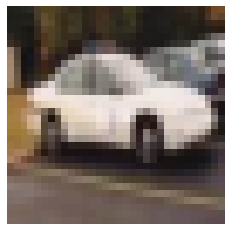

In [18]:
idx = np.random.randint(x_train2.shape[0])
x_sample = x_train2[idx]
y_sample = y_train2[idx].squeeze()

plt.imshow(x_sample)
plt.axis('off');

In [19]:
CNN_layers2 = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers2 = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [20]:
model2 = Sequential(CNN_layers2+FC_layers2)
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [21]:
model2.compile(loss='categorical_crossentropy', 
               optimizer=Adam(), 
               metrics=['categorical_accuracy'])

In [22]:
model2.fit(x_train2, y_train2, batch_size=200, epochs=10,validation_data=(x_test2, y_test2))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 332s 7ms/sample - loss: 1.8331 - categorical_accuracy: 0.3041 - val_loss: 1.6174 - val_categorical_accuracy: 0.4041
Epoch 2/10
50000/50000 [==============================] - 322s 6ms/sample - loss: 1.5558 - categorical_accuracy: 0.4239 - val_loss: 1.4349 - val_categorical_accuracy: 0.4760
Epoch 3/10
50000/50000 [==============================] - 321s 6ms/sample - loss: 1.3912 - categorical_accuracy: 0.4893 - val_loss: 1.3019 - val_categorical_accuracy: 0.5305
Epoch 4/10
50000/50000 [==============================] - 324s 6ms/sample - loss: 1.2792 - categorical_accuracy: 0.5350 - val_loss: 1.2006 - val_categorical_accuracy: 0.5662
Epoch 5/10
50000/50000 [==============================] - 329s 7ms/sample - loss: 1.1791 - categorical_accuracy: 0.5747 - val_loss: 1.1974 - val_categorical_accuracy: 0.5746
Epoch 6/10
50000/50000 [==============================] - 334s 7ms/sample - loss

In [24]:
score_train = model2.evaluate(x_train2, y_train2)
score_test = model2.evaluate(x_test2, y_test2)

print(f'Train Acc: {score_train[1]*100}')
print(f'Test Acc: {score_test[1]*100}')

10000/10000 [==============================] - 13s 1ms/sample - loss: 0.9362 - categorical_accuracy: 0.6612
Train Acc: 68.16999912261963
Test Acc: 66.11999869346619
